# Group assignment 1.4 Distribution fitting

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre and Robert Lanzafame; updated by Max Ramgraber*

*Due: Friday, September 26th 2025.*

## Case 3: Discharges on a structure

**What's the propagated uncertainty? *How large will the discharge be?***

In this project, you have chosen to work on the uncertainty of water depths ($h$) and water velocities ($u$) on top of a hydraulic structure to estimate the discharge. You have observations from physical experiments of waves impacting a breakwater during a wave storm scaled up to prototype scale. You can read further on the dataset [here](https://doi.org/10.1016/j.coastaleng.2024.104483). Remember that the discharge can be computed as

$$
q = u S
$$

where $S$ is the cross-sectional area of the flow. Thus, assuming a discharge width of $1$m, we can simplify the previous equation as

$$
q = u h 
$$

**The goal of this project is:**
1. Choose a reasonable distribution function for $u$ and $h$.
2. Fit the chosen distributions to the observations of $u$ and $h$.
3. Assuming $d$ and $h$ are independent, propagate their distributions to obtain the distribution of $q$.
4. Analyze the distribution of $q$.

## Importing packages

In [1]:
import numpy as np              # For math
import matplotlib.pyplot as plt # For plotting
from scipy import stats         # For math
from math import ceil, trunc    # For plotting

# This is just cosmetic - it updates the font size for our plots
plt.rcParams.update({'font.size': 14})

## 1. Explore the data

The first step in the analysis is exploring the data, visually and through statistics. 

Tip: In the workshop files, you have used the pandas `.describe()` function to obtain the statistics of a data vector. `scipy.stats` has a similar function.

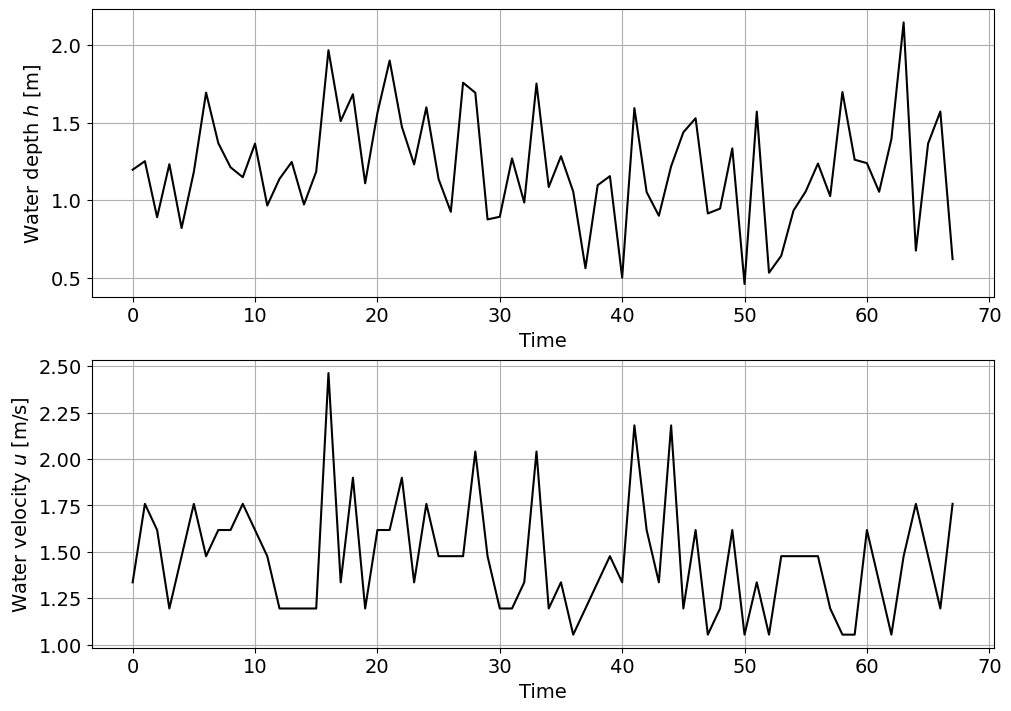

In [2]:
# Import the data from the .csv file
h, u = np.genfromtxt('dataset_hu.csv', delimiter=",", unpack=True, skip_header=True)

# Plot the time series for the number of heavy vehicles H
fig, ax = plt.subplots(2, 1, figsize=(10, 7), layout = 'constrained')
ax[0].plot(h,'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Water depth $h$ [m]')
ax[0].grid()

# Plot the time series for the number of cars C
ax[1].plot(u,'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Water velocity $u$ [m/s]')
ax[1].grid()

In [3]:
# Statistics for h
print(stats.describe(h))

DescribeResult(nobs=68, minmax=(np.float64(0.461226714), np.float64(2.145350569)), mean=np.float64(1.2111498297794114), variance=np.float64(0.12978488665520282), skewness=np.float64(0.14334685820761273), kurtosis=np.float64(-0.13187143389377054))


In [4]:
# Statistics for u
print(stats.describe(u))

DescribeResult(nobs=68, minmax=(np.float64(1.053685265), np.float64(2.462845221)), mean=np.float64(1.4639994874705884), variance=np.float64(0.0923129918424704), skewness=np.float64(0.9068207897163783), kurtosis=np.float64(0.8066103334798851))


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>

Describe the data based on the previous statistics:
- Which variable features a higher variability? Also consider the magnitudes of the different variables.
- What does the skewness coefficient represent? Which kind of distribution functions should we consider to fit based on this coefficient?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- $h$ presents a higher variance while $h$ and $u$ have a similar mean. To compare the variability of variables with different magnitudes, it can be useful to compute the <b>coefficient of variation</b>, which normalizes the standard deviation against the mean. If we do so, we obtain $CV(h)=\sigma/\mu=\sqrt{0.130}/1.211 = 0.297$ and $CV(u)=\sigma/\mu= \sqrt{0.092}/1.464 = 0.208$. Thus, $h$ has higher variability than $u$.
- Both $h$ and $u$ have a positive non-zero skewness, with the one for $u$ being significantly higher. Thus, the data presents a right tail and mode < median < mean. An appropriate distribution for $h$ and $u$ would be one which: (1) it is bounded in 0 (no negative values of $h$ or $u$ are physically possible), and (2) has a positive tail. If we consider the distributions that you have been introduced to, Lognormal, Gumbel or Exponential distributions would be a possibility. Also, Gaussian distribution might be a possibility for $h$, as the skewness is relatively low and might not be significant.
</div>

## 2. Empirical distribution functions

Now, we are going to compute and plot the empirical PDF and CDF for each variable. Note that you have the pseudo-code for the empirical CDF in the [reader](https://mude.citg.tudelft.nl/book/probability/empirical.html).

========================

WARNING: Fix the link!

========================

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>  
 
Define a function to compute the empirical CDF. Plot your empirical PDF and CDF.
</p>
</div>

In [5]:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n+1)
    return [y, x]

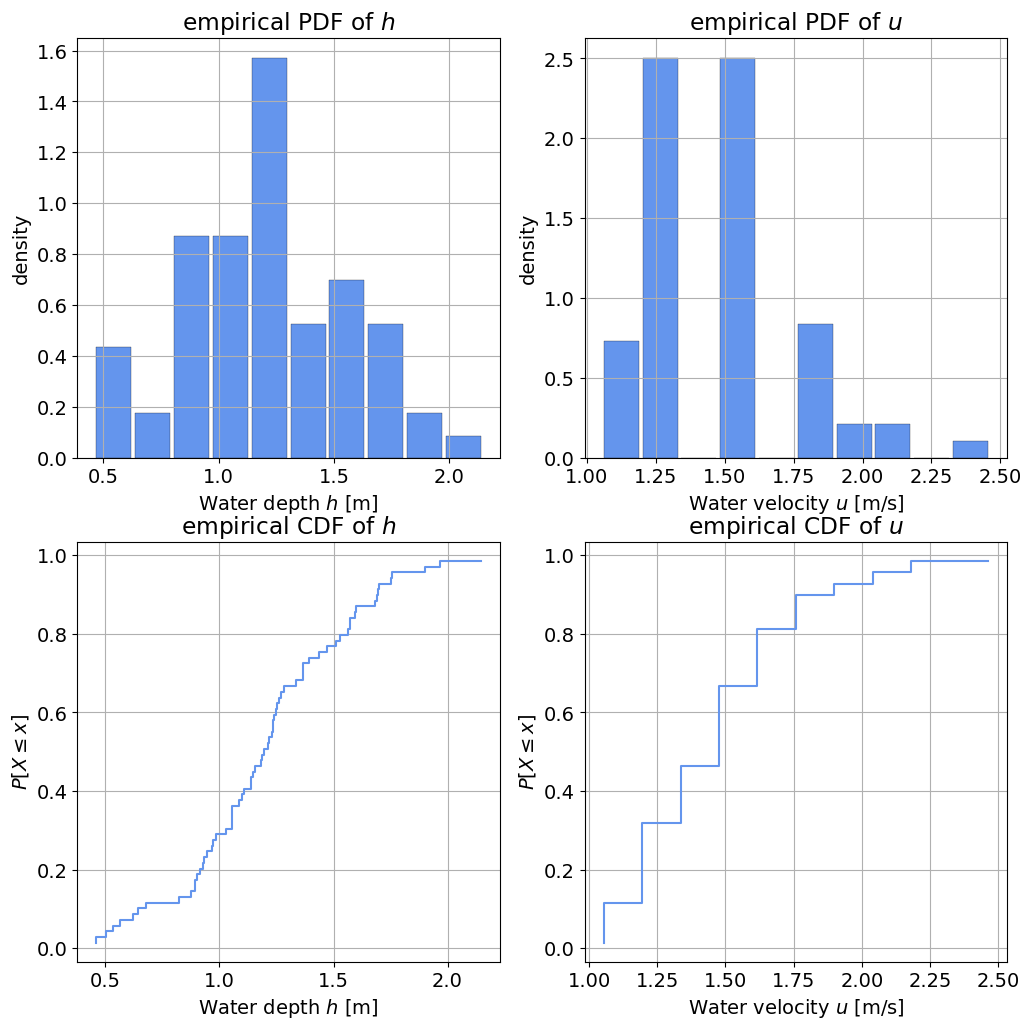

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the PDF of h
axes[0,0].hist(h, edgecolor='k', linewidth=0.2, rwidth = 0.9, color='cornflowerblue', density = True, bins = 10)
axes[0,0].set_xlabel('Water depth $h$ [m]')
axes[0,0].set_ylabel('density')
axes[0,0].set_title('empirical PDF of $h$')
axes[0,0].grid()

# Plot the PDF of u
axes[0,1].hist(u, edgecolor='k', linewidth=0.2, rwidth = 0.9,color='cornflowerblue', density = True, bins = 10)
axes[0,1].set_xlabel('Water velocity $u$ [m/s]')
axes[0,1].set_ylabel('density')
axes[0,1].set_title('empirical PDF of $u$')
axes[0,1].grid()

# Plot the empirical CDF of H
axes[1,0].step(ecdf(h)[1], ecdf(h)[0], color='cornflowerblue')
axes[1,0].set_xlabel('Water depth $h$ [m]')
axes[1,0].set_ylabel('${P[X \leq x]}$')
axes[1,0].set_title('empirical CDF of $h$')
axes[1,0].grid()

# Plot the empirical CDF of T
axes[1,1].step(ecdf(u)[1], ecdf(u)[0], color='cornflowerblue')
axes[1,1].set_xlabel('Water velocity $u$ [m/s]')
axes[1,1].set_ylabel('${P[X \leq x]}$')
axes[1,1].set_title('empirical CDF of $u$')
axes[1,1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Based on the results of Task 1 and the empirical PDF and CDF, select <b>one</b> distribution to fit to each variable. 
- For $h$, select between a Uniform or Gaussian distribution.</li>
- For $u$ choose between a Exponential or Gumbel distribution.</li>

</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

$h$: Gaussian
$u$: Gumbel
</div>
</div>

## 3. Fitting a distribution

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>  
 
Fit the selected distributions to the observations using MLE.
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)'s built-in functions (be careful with the parameter definitions!).

In [7]:
params_h = stats.norm.fit(h)
params_u = stats.gumbel_r.fit(u)

## 4. Assessing goodness of fit

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>  
 
Assess the goodness of fit of the selected distribution using:
- One graphical method: QQplot or Logscale. Choose one.
- The Kolmogorov-Smirnov test.
</p>
</div>

Hint: The Kolmogorov-Smirnov test is implemented in [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

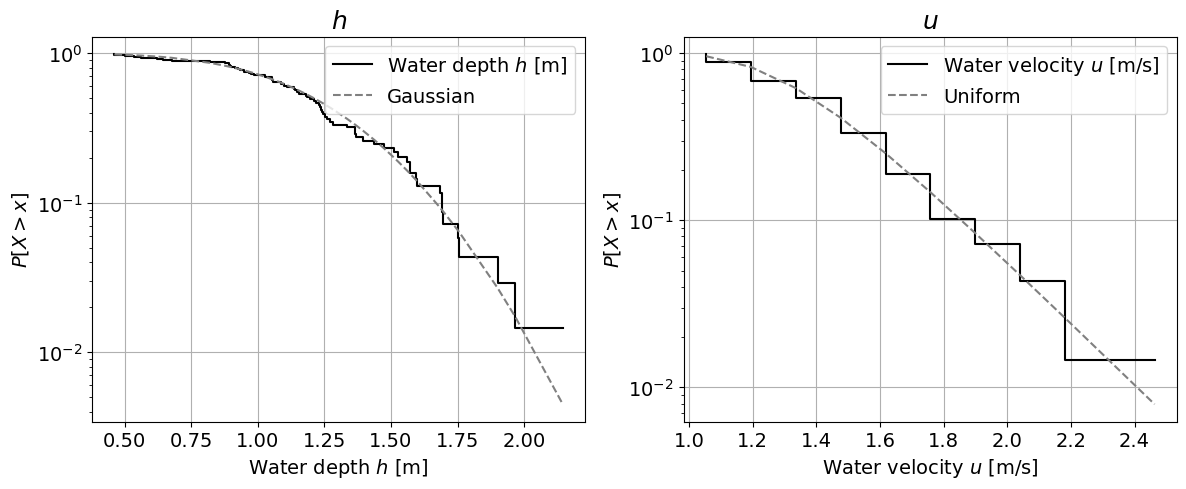

In [8]:
# Graphical method

# Logscale
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].step(ecdf(h)[1], 1-ecdf(h)[0], color='k', label='Water depth $h$ [m]')
axes[0].plot(ecdf(h)[1], 1-stats.norm.cdf(ecdf(h)[1], *params_h), '--', color = 'grey', label='Gaussian')
axes[0].set_xlabel('Water depth $h$ [m]')
axes[0].set_ylabel('${P[X > x]}$')
axes[0].set_title('$h$', fontsize=18)
axes[0].set_yscale('log')
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(u)[1], 1-ecdf(u)[0], color='k', label='Water velocity $u$ [m/s]')
axes[1].plot(ecdf(u)[1], 1-stats.gumbel_r.cdf(ecdf(u)[1], *params_u), '--', color = 'grey', label='Uniform')
axes[1].set_xlabel('Water velocity $u$ [m/s]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('$u$', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

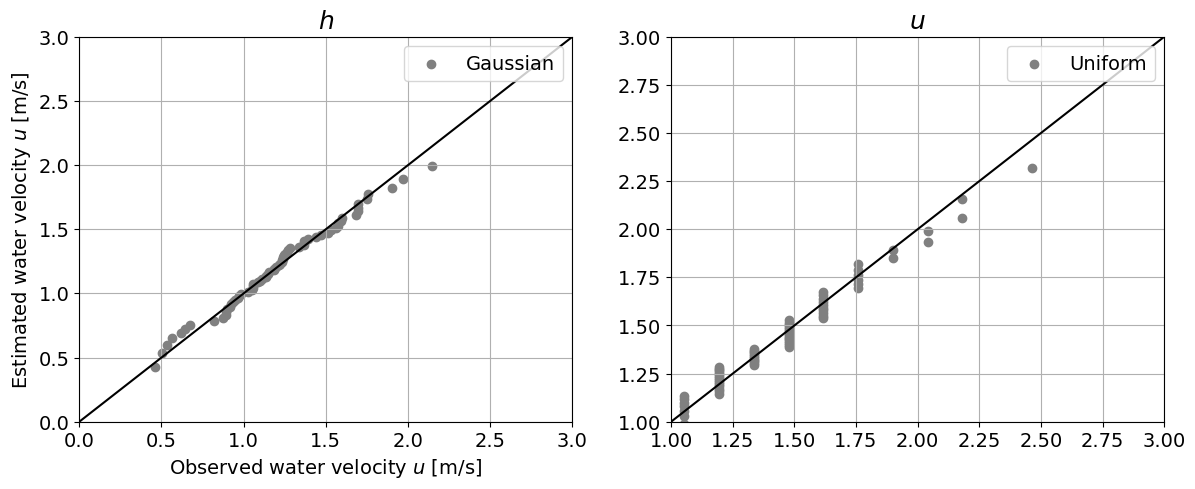

In [9]:
# QQ plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot([trunc(min(h)), ceil(max(h))], [trunc(min(h)), ceil(max(h))], 'k')
axes[0].scatter(ecdf(h)[1], stats.norm.ppf(ecdf(h)[0], *params_h), color='grey', label='Gaussian')
axes[0].set_xlabel('Observed water depth $h$ [m]')
axes[0].set_ylabel('Estimated water depth $h$ [m]')
axes[0].set_title('$h$', fontsize=18)
axes[0].set_xlim([trunc(min(h)), ceil(max(h))])
axes[0].set_ylim([trunc(min(h)), ceil(max(h))])
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].plot([trunc(min(u)), ceil(max(u))], [trunc(min(u)), ceil(max(u))], 'k')
axes[1].scatter(ecdf(u)[1], stats.gumbel_r.ppf(ecdf(u)[0], *params_u), color='grey', label='Uniform')
axes[0].set_xlabel('Observed water velocity $u$ [m/s]')
axes[0].set_ylabel('Estimated water velocity $u$ [m/s]')
axes[1].set_title('$u$', fontsize=18)
axes[1].set_xlim([trunc(min(u)), ceil(max(u))])
axes[1].set_ylim([trunc(min(u)), ceil(max(u))])
axes[1].legend(loc = "upper right")
axes[1].grid()

In [10]:
# KS test
_, p_h = stats.kstest(h,stats.norm.cdf, args=params_h)
_, p_u = stats.kstest(u,stats.gumbel_r.cdf, args=params_u)

print('The p-value for the fitted Gaussian distribution to h is:', round(p_h, 3))
print('The p-value for the fitted Gumbel distribution to u is:', round(p_u, 3))

The p-value for the fitted Gaussian distribution to h is: 0.719
The p-value for the fitted Gumbel distribution to u is: 0.152


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>  
 
Interpret the results of the GOF techniques. How does the selected parametric distribution perform?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>
    
- <b>Logscale plot</b>: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. For both $h$ and $u$, Gaussian and Gumbel distributions performs well even in the tail of the distribution. For $h$, high values start to slightly deviate from the Gaussian distribution, indicating that for lower non-exceedance probabilities it might not be a good fit. </li>
- <b>QQ plot</b>: Similar conclusions to those for Logscale can be derived.</li>
- <b>Kolmogorov-Smirnov test</b>: remember that the test statistic measures the difference between two distributions. The p-value then represents the probability of observing a difference at least that large for a sample from the assumed distribution. If p-value is lower than the significance ($\alpha=0.05$, for instance), the null hypothesis is rejected. Considering here $\alpha=0.05$, we can accept the null hypothesis that the variable $h$ comes from a Gaussian distribution and that $u$ comes from a Gumbel distribution.</li>
</div>

## 5. Propagating the uncertainty

Using the fitted distributions, we are going to propagate the uncertainty from $h$ and $u$ to $q$ **assuming that $h$ and $u$ are independent**.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
1. Draw 10,000 random samples from the fitted distribution functions for $h$ and $u$.
    
2. Compute $q$ for each pair of the generated samples.
    
3. Compute $q$ for the observations.
    
4. Plot the PDF and exceedance curve in logscale of $q$ computed using both the simulations and the observations.
</p>
</div>

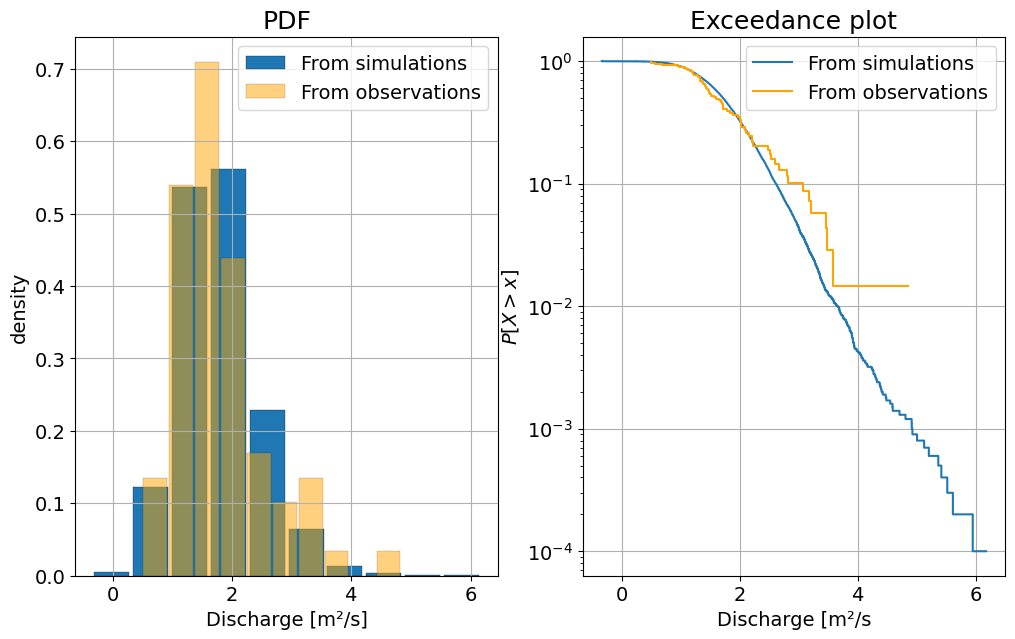

In [11]:
# Here, the solution is shown for the Lognormal distribution

# Draw random samples
rs_h = stats.norm.rvs(*params_h, size = 10000)
rs_u = stats.gumbel_r.rvs(*params_u, size = 10000)

# Compute Fh
rs_q = rs_h * rs_u

# Repeat for observations
q = h * u

# Plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_q, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations', bins = 10, rwidth = 0.9)
axes[0].hist(q, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, bins = 10, rwidth = 0.9,
             density = True, label = 'From observations')
axes[0].set_xlabel('Discharge [m²/s]')
axes[0].set_ylabel('density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend()
axes[0].grid()

axes[1].step(ecdf(rs_q)[1], 1-ecdf(rs_q)[0], label = 'From simulations')
axes[1].step(ecdf(q)[1], 1-ecdf(q)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Discharge [m²/s')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend()
axes[1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>  
 
Interpret the figures above, answering the following questions:
- Are there differences between the two computed distributions for $q$?</li>
- What are the advantages and disadvantages of using the simulations?</li>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- In the PDF plot, we can see that the shape of the distribution is similar for $q$. In the CDF plot, we can see that there are significant differences in the tail of the distribution of $q$, being the values from the observations higher than those computed from the simulations. This is because the Gaussian distribution does not properly fit the tail of the distribution of $h$ and when inferring values with very low exceedance probabilities, that becomes more noticeable.
- <b>Disadvantages:</b> we are assuming that $h$ and $u$ are independent (we will see how to address this issue next week). But is that true? Also, the results are conditioned to how good model is the selected parametric distribution. In this case, since the tail of the distribution of $h$ is not properly fitted, the obtained distribution for $q$ deviates from the one obtained from the observations. Also, some simulated values are negative and, thus, non-physical. That could be corrected using distributions bounded in 0.
- <b>Advantages:</b> I can draw all the samples I want allowing the computation of events I have not observed yet (extreme events).
</div>

If you run the code in the cell below, you will obtain a scatter plot of both variables. Explore the relationship between both variables and answer the following questions:

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   
    
1. Observe the plot below. What differences do you observe between the generated samples and the observations?
    
2. Compute the correlation between $h$ and $u$ for the samples and for the observartions. Are there differences?
    
3. What can you improve into the previous analysis? Do you have any ideas/suggestions on how to implement those suggestions?
</p>
</div>

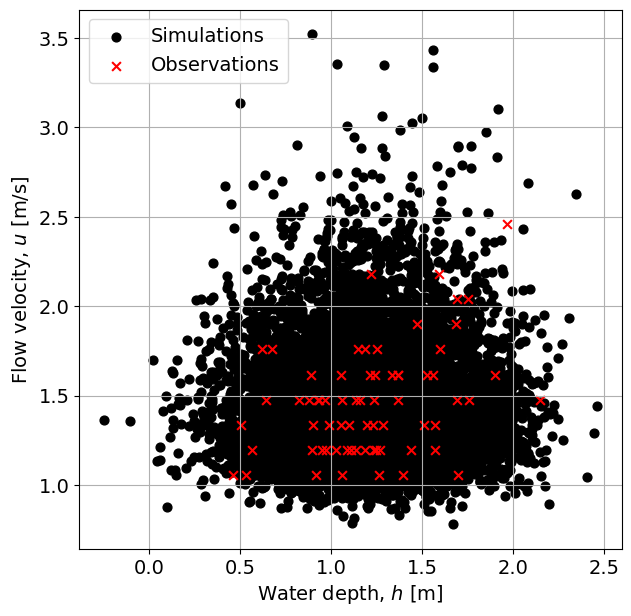

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.scatter(rs_h, rs_u, 40, 'k', label = 'Simulations')
axes.scatter(h, u, 40, 'r', marker = 'x', label = 'Observations')
axes.set_xlabel('Water depth, $h$ [m]')
axes.set_ylabel('Flow velocity, $u$ [m/s]')
axes.legend()
axes.grid()

In [13]:
# Correlation
correl = stats.pearsonr(h, u)
correl_rs = stats.pearsonr(rs_h, rs_u)
print('The correlation between the observations is:', correl[0])
print('The correlation between the simulations is:', correl_rs[0])

The correlation between the observations is: 0.386245496102831
The correlation between the simulations is: 0.022601558236554884


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- The observations are focussed in a narrower area of the plot, whereas the simulations are spreaded all around. This is because the observations are dependent, since there is a physical relationship between the water depth and the velocity of the flow, while the simualtions were assumed to be independent. </li>
- There is a correlation of 0.39 between the observed $h$ and $u$, indicating a physical dependence between the variables. On the contrary, as expected, no significant correlation between the generated samples is observed.</li>
- <b>Some suggestions:</b> Improve the fit in the tail of $h$. Account for the dependence between the two variables. </li>
</div>

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>